In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from api_keys import geoapify_key

hate_crime_df = pd.read_csv('Resources/hate_crime.csv', low_memory=False)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [2]:
#dropping columns
clean_crime = hate_crime_df.drop(columns= ["ORI", "PUB_AGENCY_UNIT", "JUVENILE_VICTIM_COUNT","ADULT_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", "JUVENILE_OFFENDER_COUNT", "POPULATION_GROUP_CODE"])
clean_crime.count()
# clean_crime.dropna()
                                                 

INCIDENT_ID                 201403
DATA_YEAR                   201403
PUB_AGENCY_NAME             201403
AGENCY_TYPE_NAME            201403
STATE_ABBR                  201403
STATE_NAME                  201403
DIVISION_NAME               201403
REGION_NAME                 201403
POPULATION_GROUP_DESC       201403
INCIDENT_DATE               201403
TOTAL_OFFENDER_COUNT        201403
OFFENDER_RACE               201384
OFFENDER_ETHNICITY           18150
VICTIM_COUNT                201403
OFFENSE_NAME                201403
TOTAL_INDIVIDUAL_VICTIMS    199797
LOCATION_NAME               201403
BIAS_DESC                   201403
VICTIM_TYPES                201403
MULTIPLE_OFFENSE            201403
MULTIPLE_BIAS               201403
dtype: int64

In [3]:
clean_crime.head()

,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,Rogers,City,AR,Arkansas,West South Central,South,"Cities from 10,000 thru 24,999",31-AUG-91,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,Hope,City,AR,Arkansas,West South Central,South,"Cities from 2,500 thru 9,999",19-SEP-91,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",04-JUL-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",24-DEC-91,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",23-DEC-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
years_df = clean_crime[["STATE_NAME", 'DATA_YEAR','INCIDENT_DATE']].copy()
years_df

,STATE_NAME,DATA_YEAR,INCIDENT_DATE
0,Arkansas,1991,31-AUG-91
1,Arkansas,1991,19-SEP-91
2,Arkansas,1991,04-JUL-91
3,Arkansas,1991,24-DEC-91
4,Arkansas,1991,23-DEC-91
...,...,...,...
201398,West Virginia,2018,14-DEC-18
201399,West Virginia,2018,14-NOV-18
201400,West Virginia,2018,26-NOV-18
201401,West Virginia,2018,31-JAN-18


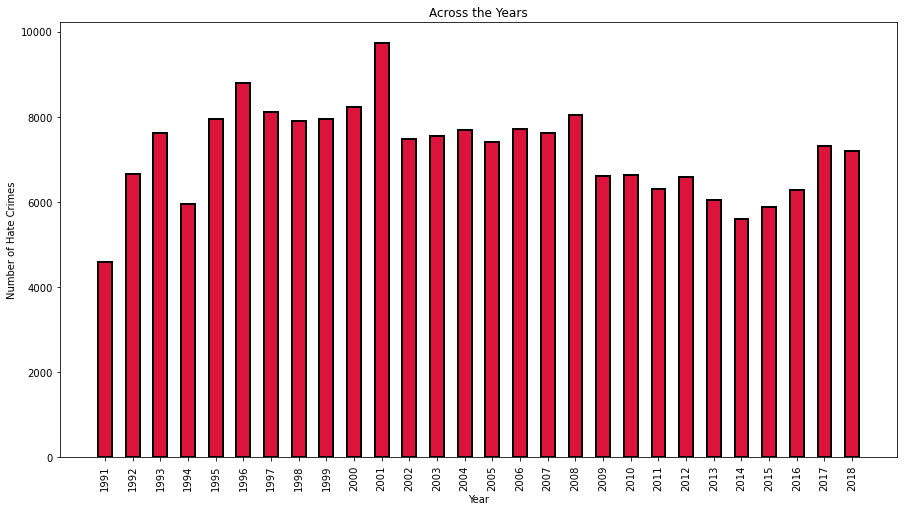

In [5]:
year_counts= years_df['DATA_YEAR'].value_counts()

x = year_counts.index.values
y = year_counts.values
plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across the Years")
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

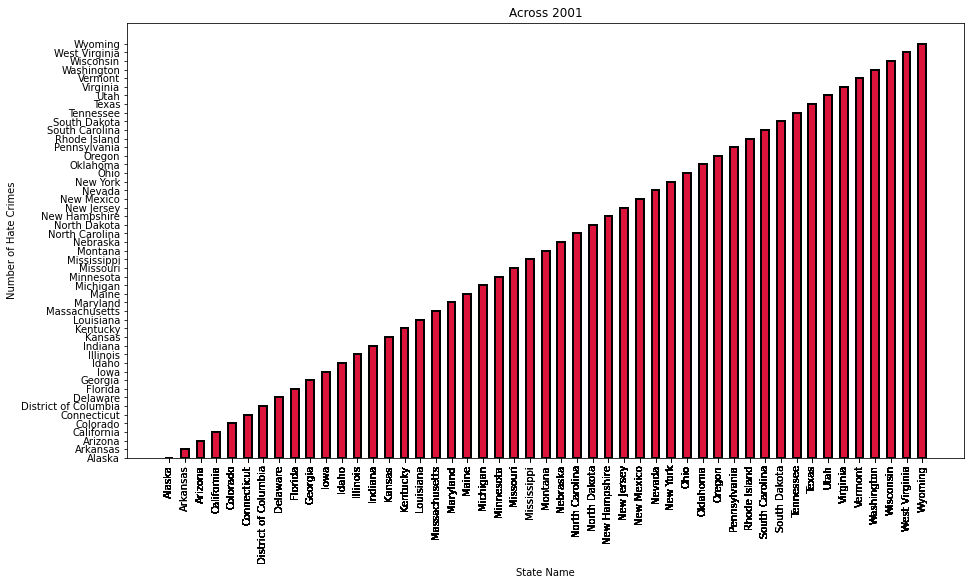

In [6]:
peak_year = years_df[years_df['DATA_YEAR'] == 2001]

names = peak_year['STATE_NAME']
state_counts = peak_year['STATE_NAME']

x = names
y = state_counts

plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across 2001")
plt.xlabel('State Name')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

In [7]:
peak_year['STATE_NAME'].values

array(['Alaska', 'Alaska', 'Alaska', ..., 'Wyoming', 'Wyoming', 'Wyoming'],
      dtype=object)

In [8]:
date_data = peak_year['INCIDENT_DATE'].value_counts()

In [9]:
date_df = pd.DataFrame(date_data)
date_df

,INCIDENT_DATE
12-SEP-01,178
13-SEP-01,150
11-SEP-01,147
14-SEP-01,145
15-SEP-01,121
...,...
06-JUL-01,9
27-DEC-01,8
24-DEC-01,7
26-DEC-01,6


In [10]:
new_index = date_df.index.to_series().str.split("-").str[1:].str.join("-")
peak_year_df = date_df.groupby(new_index).sum()
sorted_peakyear_df = peak_year_df.reindex(index = ["JAN-01", "FEB-01", "MAR-01", "APR-01", "MAY-01", "JUN-01", "JUL-01", "AUG-01", "SEP-01", "OCT-01", "NOV-01", "DEC-01"])
sorted_peakyear_final = sorted_peakyear_df.reset_index().rename(columns={'index': "Month", 'INCIDENT_DATE': "Number of Incidents"})
sorted_peakyear_final

,Month,Number of Incidents
0,JAN-01,625
1,FEB-01,546
2,MAR-01,726
3,APR-01,798
4,MAY-01,737
5,JUN-01,755
6,JUL-01,687
7,AUG-01,711
8,SEP-01,1966
9,OCT-01,1048


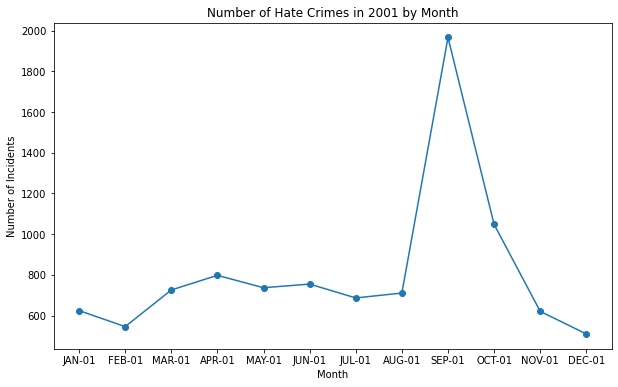

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(sorted_peakyear_final['Month'], sorted_peakyear_final['Number of Incidents'], marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("Number of Hate Crimes in 2001 by Month")
plt.xticks((range(0,12)), sorted_peakyear_final["Month"])
plt.show()




In [12]:
year_bias = pd.DataFrame(clean_crime.groupby(["DATA_YEAR"])['BIAS_DESC'])
year_bias.columns = ['Year', "Bias Description"]
year_bias["Bias Description"][10].value_counts().nlargest(10)




                        

Anti-Black or African American        2920
Anti-Other Race/Ethnicity/Ancestry    1251
Anti-Jewish                           1051
Anti-Gay (Male)                        991
Anti-White                             818
Anti-Hispanic or Latino                605
Anti-Islamic (Muslim)                  499
Anti-Asian                             280
Anti-Arab                              254
Anti-Multiple Races, Group             218
Name: BIAS_DESC, dtype: int64

In [13]:
ninety_one_bias = pd.DataFrame(year_bias['Bias Description'][0].value_counts().nlargest(10).reset_index().rename(columns={"index": "Bias Description", "BIAS_DESC": "Number of Incidents"}))
zero_one_bias = pd.DataFrame(year_bias['Bias Description'][10].value_counts().nlargest(10).reset_index().rename(columns={"index": "Bias Description", "BIAS_DESC": "Number of Incidents"}))
eighteen_bias = pd.DataFrame(year_bias['Bias Description'][27].value_counts().nlargest(10).reset_index().rename(columns={"index": "Bias Description", "BIAS_DESC": "Number of Incidents"}))

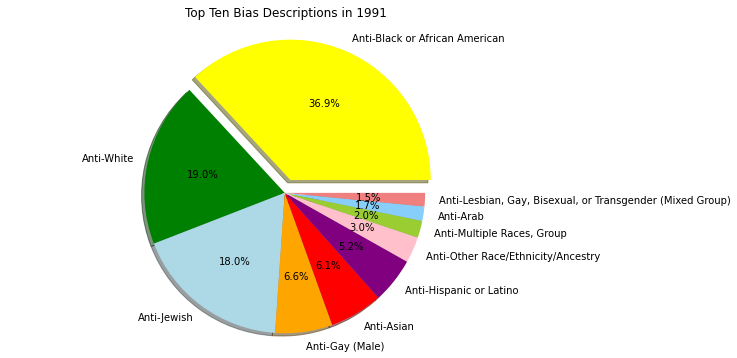

In [14]:
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
ninety_one_incidents = ninety_one_bias["Number of Incidents"]
ninety_one_labels = ninety_one_bias["Bias Description"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(ninety_one_incidents, colors=colors, labels=ninety_one_labels, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top Ten Bias Descriptions in 1991")
plt.show()

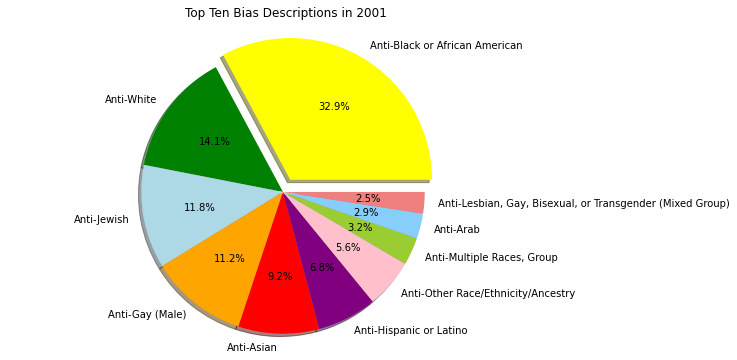

In [15]:
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
zero_one_incidents = zero_one_bias["Number of Incidents"]
zero_one_labels = ninety_one_bias["Bias Description"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(zero_one_incidents, colors=colors, labels=zero_one_labels, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top Ten Bias Descriptions in 2001")
plt.show()

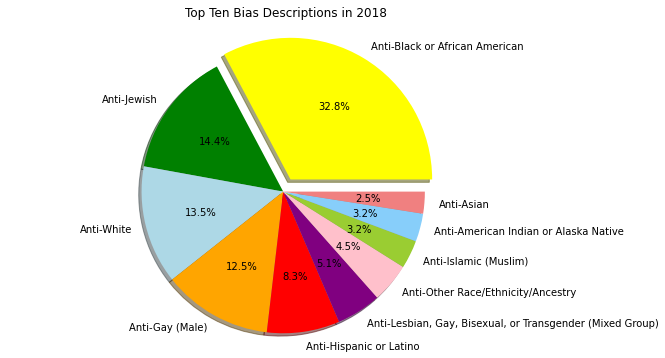

In [16]:
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
eighteen_incidents = eighteen_bias["Number of Incidents"]
eighteen_labels = eighteen_bias["Bias Description"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(eighteen_incidents, colors=colors, labels=eighteen_labels, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top Ten Bias Descriptions in 2018")
plt.show()

In [246]:
reduced_clean = clean_crime[["DATA_YEAR", "STATE_NAME", 'INCIDENT_DATE', 'BIAS_DESC']]
reduced_clean = pd.concat([reduced_clean.loc[:,~reduced_clean.columns.isin(['INCIDENT_DATE'])], reduced_clean['INCIDENT_DATE'].str.split('-',expand=True).rename(columns={0: 'Day', 1: 'Month', 2: 'Year'})],axis=1)
reduced_clean
islamic_bias = reduced_clean[reduced_clean['BIAS_DESC'].isin(['Anti-Islamic (Muslim)', 'Anti-Arab'])]
islamic_bias2 = islamic_bias[islamic_bias['DATA_YEAR'].isin(['2001'])]
islamic_bias_sept = islamic_bias2[islamic_bias2['Month'].isin(['SEP'])]
islamic_bias_sept_sorted = islamic_bias_sept.sort_values(by='Day')
islamic_bias_sept_sorted




,DATA_YEAR,STATE_NAME,BIAS_DESC,Day,Month,Year
80320,2001,Nevada,Anti-Islamic (Muslim),02,SEP,01
78594,2001,Michigan,Anti-Islamic (Muslim),06,SEP,01
82923,2001,Virginia,Anti-Arab,08,SEP,01
82236,2001,Texas,Anti-Arab,09,SEP,01
76346,2001,California,Anti-Islamic (Muslim),09,SEP,01
...,...,...,...,...,...,...
76670,2001,Connecticut,Anti-Arab,30,SEP,01
79360,2001,Nebraska,Anti-Islamic (Muslim),30,SEP,01
82629,2001,Texas,Anti-Arab,30,SEP,01
80273,2001,New Jersey,Anti-Arab,30,SEP,01


In [228]:
df = pd.DataFrame(islamic_bias2.groupby(['Month'])['BIAS_DESC'].value_counts())
df2 = df.rename(columns={'BIAS_DESC': 'Count'})
dfp = df2.pivot_table(index='BIAS_DESC', columns='Month', values=['Count'])
dfp2 = dfp.reset_index()
dfp2.columns
dfp2 = dfp2[[('BIAS_DESC', ''), ('Count', 'JAN'), ('Count', 'FEB'), ('Count', 'MAR'), ('Count', 'APR'), ('Count', 'MAY'), 
             ('Count', 'JUN'), ('Count', 'JUL'), ('Count', 'AUG'), ('Count', 'SEP'), ('Count', 'OCT'), ('Count', 'NOV'), 
             ('Count', 'DEC')]]
dfp2

BIAS_DESC Count                                            \
Month                          JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG    SEP   
0                  Anti-Arab   1.0  NaN  3.0  3.0  1.0  2.0  1.0  2.0  178.0   
1      Anti-Islamic (Muslim)   1.0  1.0  2.0  2.0  5.0  2.0  5.0  3.0  330.0   

                         
Month   OCT   NOV   DEC  
0      48.0  11.0   4.0  
1      94.0  25.0  29.0

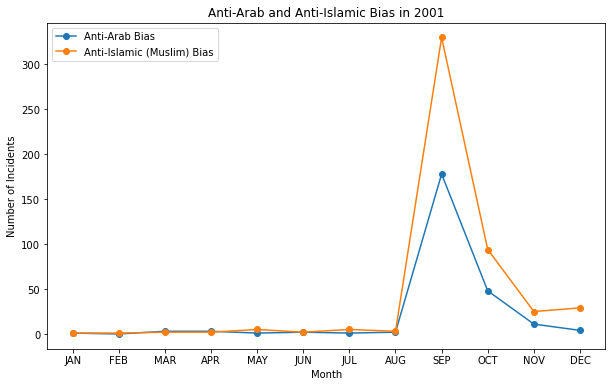

In [234]:
x = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
y = [1, 0, 3, 3, 1, 2, 1, 2, 178, 48, 11, 4]
z = [1, 1, 2, 2, 5, 2, 5, 3, 330, 94, 25, 29]


plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(x, y, marker='o')
plt.plot(x, z, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("Anti-Arab and Anti-Islamic Bias in 2001")
plt.xticks((range(0,12)), x)
plt.legend(['Anti-Arab Bias', 'Anti-Islamic (Muslim) Bias'], loc='upper left')
plt.show()

In [257]:
df_sept = pd.DataFrame(islamic_bias_sept_sorted.groupby(['Day'])['BIAS_DESC'].value_counts())
df_sept = df_sept.rename(columns={'BIAS_DESC': 'Count'})
df_sept = df_sept.pivot_table(index='BIAS_DESC', columns='Day', values=['Count'])
df_sept = df_sept.reset_index()
df_sept

BIAS_DESC Count                                              \
Day                           02   06   08   09   10    11    12    13    14   
0                Anti-Arab   NaN  NaN  1.0  1.0  1.0  15.0  20.0  24.0  21.0   
1    Anti-Islamic (Muslim)   1.0  1.0  NaN  2.0  2.0  48.0  51.0  27.0  23.0   

     ...                                                        
Day  ...    21    22    23    24   25   26   27   28   29   30  
0    ...   3.0   2.0   6.0   3.0  2.0  6.0  4.0  3.0  1.0  7.0  
1    ...  13.0  12.0  12.0  10.0  6.0  5.0  6.0  6.0  3.0  3.0  

[2 rows x 26 columns]

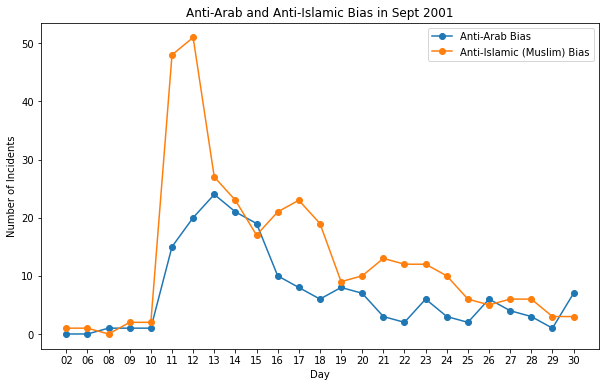

In [266]:
x2 = ['02', '06', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 
     '25', '26', '27', '28', '29', '30']
y2 = [0, 0, 1, 1, 1, 15, 20, 24, 21, 19, 10, 8, 6, 8, 7, 3, 2, 6, 3, 2, 6, 4, 3, 1, 7]
z2 = [1, 1, 0, 2, 2, 48, 51, 27, 23, 17, 21, 23, 19, 9, 10, 13, 12, 12, 10, 6, 5, 6, 6, 3, 3]

plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(x2, y2, marker='o')
plt.plot(x2, z2, marker='o')
plt.xlabel("Day")
plt.ylabel("Number of Incidents")
plt.title("Anti-Arab and Anti-Islamic Bias in Sept 2001")
plt.xticks((range(0,25)), x2)
plt.legend(['Anti-Arab Bias', 'Anti-Islamic (Muslim) Bias'], loc='upper right')
plt.show()

In [264]:
df_sept[('Count', '21')]

0     3.0
1    13.0
Name: (Count, 21), dtype: float64